---------
특징 선택 (feature select)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


df = pd.read_csv("C:/Users/7kingdom/Documents/인공지능개론/src/boston.csv", index_col='Unnamed: 0')
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  PRICE  
0        -122.23  4.526  
1        -122.22  3.585  
2        -122.24  3.521  
3        -122.25  3.413  
4        -122.25  3.422  
...          ...    ...  
20635    -121.09  0.781  
20636    -121.21  0.771  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894  

[20640 rows x 9 columns]

---
| MedInc | 블록의 중간 소득 | <br>
| HouseAge | 블록의 중간 주택 연도 |<br>
| AveRooms | 주택 1가구당 평균 방의 수 |<br>
| AveBedrms | 주택 1가구당 평균 침실의 수 |<br>
| Population | 인구 |<br>
| AveOccup |  average house occupancy 평균 주택점유율 |<br>
| Latitude | 위도 |<br>
| Longitude | 경도 |<br>


피쳐를 해석해봤는데 뭐가 집값이랑 관련이 있는 지 알 수가 없다.<br>
이를 파악하기 위한 것이 상관 관계 행렬이다.

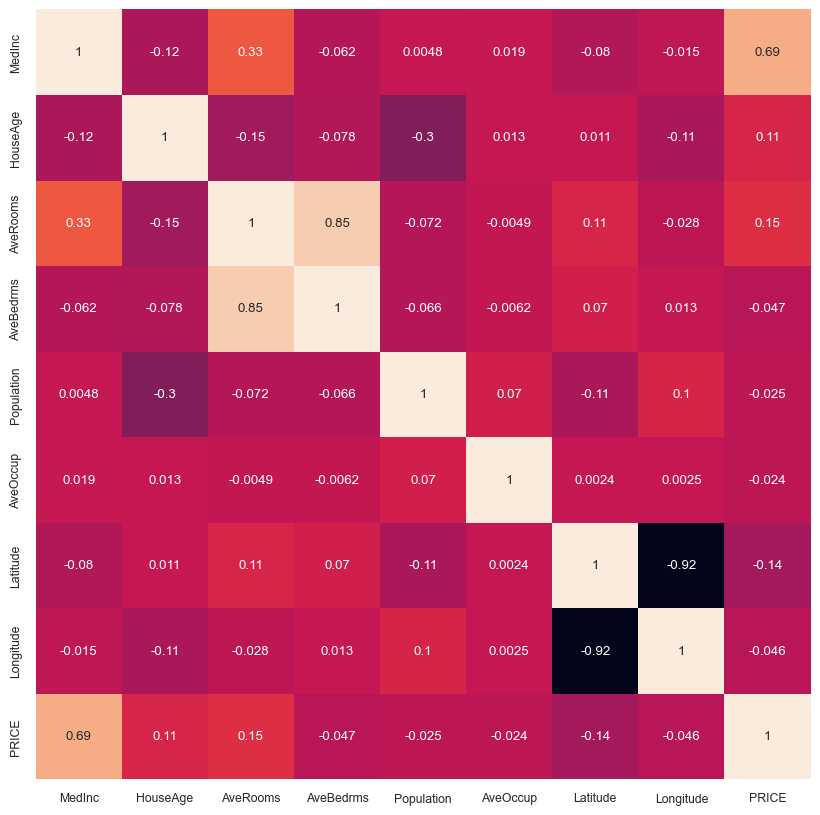

In [3]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

다 무시하고 레이블인 집값을 보면은 상관 관계가 Medinc가 0.69로 아주 많이 관련이 있다. <br>
그렇다면 학습을 진행할 때 관계 없는 나머지보다 Medinc에 집중하는게 MSE를 잘 뽑을 수 있다.<br>
하지만 피쳐가 1개라면 1 대 1 대응이니까 의미가 없어서 다음으로 관계있는 AveRooms를 추가해서 모든 피쳐를 넣은 모델과 비교해보자

-----

<h3> 일단 모든 피쳐를 넣은 모델

In [4]:
A_X = df.drop('PRICE',axis=1)
A_X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [5]:
A_y = df['PRICE']
A_y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

A_X_train, A_X_test, A_y_train, A_y_test=train_test_split(A_X,
                                                  A_y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(A_X_train.shape, A_y_train.shape)
print(A_X_test.shape, A_y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(A_X_train, A_y_train)
ly_preds = model.predict(A_X_test)

print("선형 회귀 ")
print('평균제곱근오차', mean_squared_error(ly_preds, A_y_test))


선형 회귀 
평균제곱근오차 0.5269927956248035


In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(A_X_train, A_y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(A_X_test)

print("디시전 트리")
print('평균제곱근오차', mean_squared_error(dy_preds, A_y_test))

디시전 트리
평균제곱근오차 0.47742785703471413


In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(A_X_train, A_y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(A_X_test)

print("랜덤포레스트")
print('평균제곱근오차', mean_squared_error(ry_preds, A_y_test))

랜덤포레스트
평균제곱근오차 0.2526853254760831


In [10]:
#from sklearn.svm import SVR
#
#model = SVR(kernel='linear')
#model.fit(A_X_train, A_y_train)
#
#from sklearn.metrics import mean_squared_error
#
#ry_preds = model.predict(A_X_test)
#
#print("SVR")
#print('평균제곱근오차', mean_squared_error(ry_preds, A_y_test))

#할려 했는데 너무 느려서 컷

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


k = 5  # 이웃의 수 설정
knn_regressor = KNeighborsRegressor(n_neighbors=k)

knn_regressor.fit(A_X_train, A_y_train)

y_pred = knn_regressor.predict(A_X_test)


# 모델 성능 평가 (예시로 평균 제곱 오차 사용)
print("KNN")
mse = mean_squared_error(y_pred, A_y_test)
print("평균제곱근오차:", mse)

KNN
평균제곱근오차: 1.1557853715421391


모든 피쳐를 넣으면 이정도 MSE를 제공한다. 다음은 2개의 피쳐만 사용해보자.

----

<h3> 가장 관계 있는 피쳐 1개만 써보기

관계도 0.69를 자랑하는 Medinc만 사용해보자.

In [12]:
One_drop_FT = ['HouseAge','AveRooms', 'AveBedrms','Population','AveOccup','Latitude','Longitude','PRICE']

One_X = df.drop(One_drop_FT,axis=1)
One_X.head()

MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462

In [13]:
One_y = df['PRICE']
One_y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

One_X_train, One_X_test, One_y_train, One_y_test=train_test_split(One_X,
                                                  One_y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(One_X_train.shape, One_y_train.shape)
print(One_X_test.shape, One_y_test.shape)

(16512, 1) (16512,)
(4128, 1) (4128,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(One_X_train, One_y_train)
ly_preds = model.predict(One_X_test)

print("선형 회귀")
print('평균제곱근오차', mean_squared_error(ly_preds, One_y_test))


선형 회귀
평균제곱근오차 0.7028749315031905


In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(One_X_train, One_y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(One_X_test)

print("디시전 트리")
print('평균제곱근오차', mean_squared_error(dy_preds, One_y_test))

디시전 트리
평균제곱근오차 1.1702564942080804


In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(One_X_train, One_y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(One_X_test)

print("랜덤포레스트")
print('평균제곱근오차', mean_squared_error(ry_preds, One_y_test))

랜덤포레스트
평균제곱근오차 0.9454427871285044


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


k = 5  # 이웃의 수 설정
knn_regressor = KNeighborsRegressor(n_neighbors=k)

knn_regressor.fit(One_X_train, One_y_train)

y_pred = knn_regressor.predict(One_X_test)


# 모델 성능 평가 (예시로 평균 제곱 오차 사용)
print("KNN")
mse = mean_squared_error(y_pred, One_y_test)
print("평균제곱근오차:", mse)

KNN
평균제곱근오차: 0.8207580371394012


<h3>Medinc와 AveRooms만 써본 모델

2개의 피쳐는 위에서 선택한 Medinc와 AveRooms을 써보자,

In [19]:
Two_drop_FT = ['HouseAge', 'AveBedrms','Population','AveOccup','Latitude','Longitude','PRICE']

Two_X = df.drop(Two_drop_FT,axis=1)
Two_X.head()

MedInc  AveRooms
0  8.3252  6.984127
1  8.3014  6.238137
2  7.2574  8.288136
3  5.6431  5.817352
4  3.8462  6.281853

In [20]:
Two_y = df['PRICE']
Two_y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

Two_X_train, Two_X_test, Two_y_train, Two_y_test=train_test_split(Two_X,
                                                  Two_y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(Two_X_train.shape, Two_y_train.shape)
print(Two_X_test.shape, Two_y_test.shape)

(16512, 2) (16512,)
(4128, 2) (4128,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(Two_X_train, Two_y_train)
ly_preds = model.predict(Two_X_test)

print("선형 회귀")
print('평균제곱근오차', mean_squared_error(ly_preds, Two_y_test))


선형 회귀
평균제곱근오차 0.6916011698420803


In [23]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(Two_X_train, Two_y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(Two_X_test)

print("디시전 트리")
print('평균제곱근오차', mean_squared_error(dy_preds, Two_y_test))

디시전 트리
평균제곱근오차 1.1978292995411095


In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(Two_X_train, Two_y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(Two_X_test)

print("랜덤포레스트")
print('평균제곱근오차', mean_squared_error(ry_preds, Two_y_test))

랜덤포레스트
평균제곱근오차 0.688814951908729


In [25]:
#from sklearn.svm import SVR
#
#model = SVR(kernel='linear')
#model.fit(Two_X_train, Two_y_train)
#
#from sklearn.metrics import mean_squared_error
#
#ry_preds = model.predict(Two_X_test)
#
#print("SVR")
#print('평균제곱근오차', mean_squared_error(ry_preds, Two_y_test))

#할려 했는데 너무 느려서 컷

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


k = 5  # 이웃의 수 설정
knn_regressor = KNeighborsRegressor(n_neighbors=k)

knn_regressor.fit(Two_X_train, Two_y_train)

y_pred = knn_regressor.predict(Two_X_test)


# 모델 성능 평가 (예시로 평균 제곱 오차 사용)
print("KNN")
mse = mean_squared_error(y_pred, Two_y_test)
print("평균제곱근오차:", mse)

KNN
평균제곱근오차: 0.6881675668607915


---------

<h3>Medinc와 AveRooms + 다음으로 관계 높은 Latitude도 추가해서 3개의 피쳐를 쓴 모델

In [27]:
Tree_drop_FT = ['HouseAge', 'AveBedrms','Population','AveOccup','Longitude','PRICE']

Tree_X = df.drop(Tree_drop_FT,axis=1)
Tree_X.head()

MedInc  AveRooms  Latitude
0  8.3252  6.984127     37.88
1  8.3014  6.238137     37.86
2  7.2574  8.288136     37.85
3  5.6431  5.817352     37.85
4  3.8462  6.281853     37.85

In [28]:
Tree_y = df['PRICE']
Tree_y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

Tree_X_train, Tree_X_test, Tree_y_train, Tree_y_test=train_test_split(Tree_X,
                                                  Tree_y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(Tree_X_train.shape, Tree_y_train.shape)
print(Tree_X_test.shape, Tree_y_test.shape)

(16512, 3) (16512,)
(4128, 3) (4128,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(Tree_X_train, Tree_y_train)
ly_preds = model.predict(Tree_X_test)

print("선형 회귀")
print('평균제곱근오차', mean_squared_error(ly_preds, Tree_y_test))


선형 회귀
평균제곱근오차 0.6837417052679097


In [31]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(Tree_X_train, Tree_y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(Tree_X_test)

print("디시전 트리")
print('평균제곱근오차', mean_squared_error(dy_preds, Tree_y_test))

디시전 트리
평균제곱근오차 0.9636320965075096


In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(Tree_X_train, Tree_y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(Tree_X_test)

print("랜덤포레스트")
print('평균제곱근오차', mean_squared_error(ry_preds, Tree_y_test))

랜덤포레스트
평균제곱근오차 0.512703457541522


In [33]:
#from sklearn.svm import SVR
#
#model = SVR(kernel='linear')
#model.fit(Tree_X_train, Tree_y_train)
#
#from sklearn.metrics import mean_squared_error
#
#ry_preds = model.predict(Tree_X_test)
#
#print("SVR")
#print('평균제곱근오차', mean_squared_error(ry_preds, Tree_y_test))

#할려 했는데 너무 느려서 컷

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


k = 5  # 이웃의 수 설정
knn_regressor = KNeighborsRegressor(n_neighbors=k)

knn_regressor.fit(Tree_X_train, Tree_y_train)

y_pred = knn_regressor.predict(Tree_X_test)


# 모델 성능 평가 (예시로 평균 제곱 오차 사용)
print("KNN")
mse = mean_squared_error(y_pred, Tree_y_test)
print("평균제곱근오차:", mse)

KNN
평균제곱근오차: 0.6105549467515639


---------

ALL

선형 회귀 <br>
평균제곱근오차 0.5269927956248035<br>
디시전 트리<br>
평균제곱근오차 0.4884177080423207<br>
랜덤포레스트<br>
평균제곱근오차 0.25084898502384867<br>
KNN<br>
평균제곱근오차: 1.1557853715421391<br>
<br>
1개<br>
선형 회귀<br>
평균제곱근오차 0.7028749315031905<br>
디시전 트리<br>
평균제곱근오차 1.1702564942080804<br>
랜덤포레스트<br>
평균제곱근오차 0.9441296762056886<br>
KNN<br>
평균제곱근오차: 0.8207580371394012<br>
<br>
2개<br>
선형 회귀<br>
평균제곱근오차 0.6916011698420803<br>
디시전 트리<br>
평균제곱근오차 1.1973053450349807<br>
랜덤포레스트<br>
평균제곱근오차 0.68354494576417<br>
KNN<br>
평균제곱근오차: 0.6881675668607915<br>
<br>
3개<br>
선형 회귀<br>
평균제곱근오차 0.6837417052679097<br>
디시전 트리<br>
평균제곱근오차 0.9503907278544089<br>
랜덤포레스트<br>
평균제곱근오차 0.5130244388257551<br>
KNN<br>
평균제곱근오차: 0.6105549467515639<br>

-------

<h3> 결론

관련도 높은 것만 뽑은 모델1,2,3 전부 다 그냥 다 넣은 모델보다 MSE가 높게 나왔다.<br>
<br>
이 이유는 애초에 데이터가 너무 적어서 안그래도 적은 데이터 select한다고 더 적어져 언더 피팅이 예상된다.<br>
<br>
그렇기 때문에 1개, 2개, 3개 피쳐를 쓰는 걸 비교해보면 점차 데이터량이 많아져서 MSE가 낮아진다.<br>